<a href="https://colab.research.google.com/github/abhishek-marathe04/learning-pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Lets expore an example pytorch end to end workflow.

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

In [2]:
import torch
from torch import nn ## nn contains all building blocks for graphs
import matplotlib.pyplot as plt


# Check pytorch version
torch.__version__

'2.9.0+cpu'

## 1. Data (Preparing and loading)

Data can be almost anything.. in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data ...)
* Audio like songs and podcasts
* DNA
* Text

Machine learning is game of two parts
1. Get data into numberical representation
2. Build a model to learn patterns in that numerical representation

To Showcase this, lets create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.


In [3]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

In [6]:
### Splitting daa into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [7]:
len(X_train), len(X_test)

(40, 10)

In [8]:
len(y_train), len(y_test)

(40, 10)

Lets visualise our data

In [10]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")


  # Are there predictions?
  if predictions is not None:
    # Plot predictions if exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14})


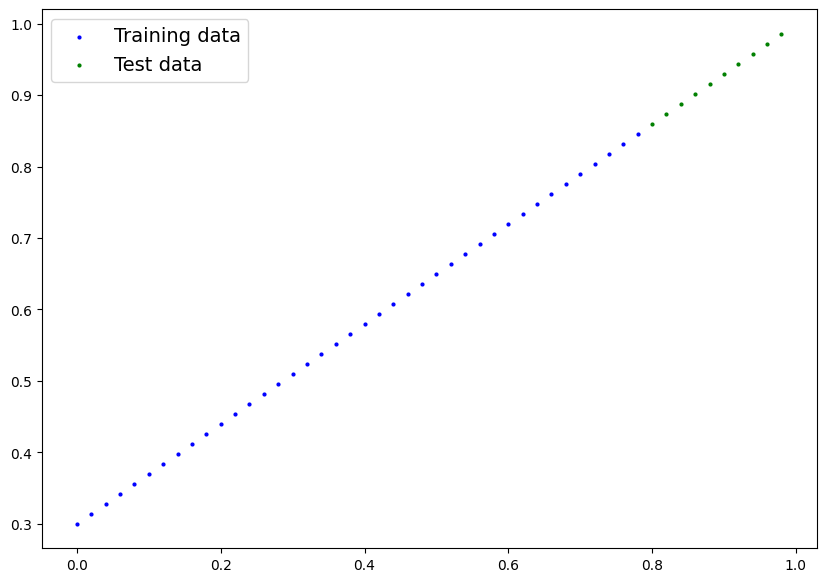

In [11]:
plot_predictions()

## Build Model

our first pytorch model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent the idea values

How does it do?

Using two alogrithms
1. Gradient discent
2. Back Propogation

In [13]:
from torch import nn
# Create a Linear regression model class

class LinearRegressionModel(nn.Module): # <- Almost everythin in pytorch inherit from nn Module
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.weights = nn.Parameter(torch.randn(1, # Start with random value
                                            requires_grad=True, # Requires gradient
                                            dtype=torch.float)) # Its default for pytorch
    self.bias = nn.Parameter(torch.randn(1,  # Start with random value
                                            requires_grad=True, # Requires gradient
                                            dtype=torch.float)) # Its default for pytorch

  # Forward method to define computation in model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # This is linear regression formula


### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).

### Checking the contents of our pytorch model

Now we've createa a model, lets see whats inside...

We can check then using parameters()

In [17]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of model
model_0 = LinearRegressionModel()

# Check out the params
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
# We need to get closer to these values
weight, bias

(0.7, 0.3)

### Make predictions using `torch.inference_mode()`

to check our model's Predictive power, lets see how well it predicts y_test based on X_test
When we pass data through our model, its going to run through `forward()` method

In [21]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [23]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

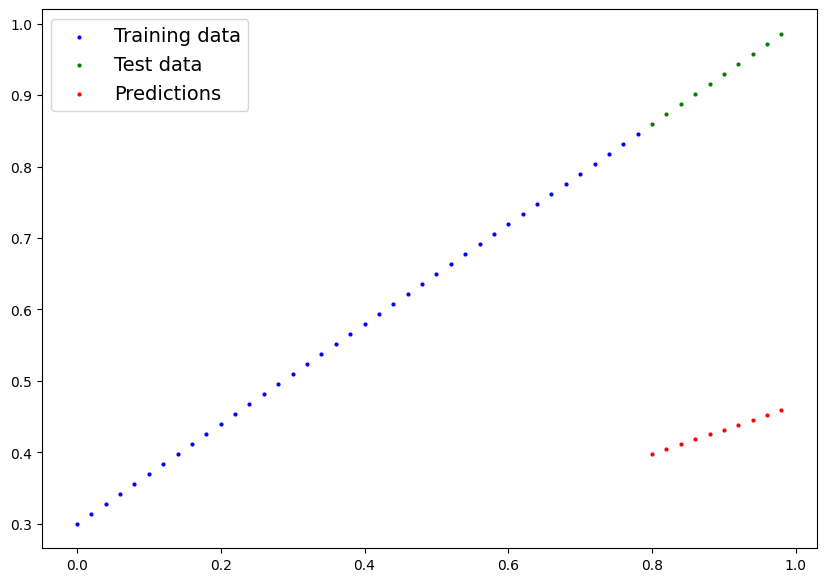

In [24]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The idea of training is for a model to move from some unknown parameters to some known parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function.

* Note : Loss function may also called as cost function or criterion in different areas.

Things we need to train :
* **Loss function:**  A function to measure how wrong your model's predictions are to the ideal outputs, lower is better

* **Optimizer:** Takes in account the loss of a model and adjusts the model's parameters (weights and biases) to improve the loss function.

And specifically for pyTorch, We need:

* Training loop
* Testing loop

In [29]:
# Setup a loss function
# We will do mean sqare error loss
# loss_fn = torch.mean(torch.abs(y_preds-y_test))
# Or we can directly use it from pytorch
loss_fn = nn.L1Loss()

# Setup an optimiser (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # Learning rate = Possibly the most important hypermarater you can set